# PCA example

In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../datasets/diabetes.csv')

In [27]:
#select only the numeric columns
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [28]:
#Handling missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df[numeric_cols])

In [29]:
#Convert back to a dataframe
data_Clean = pd.DataFrame(data_imputed, columns = numeric_cols)

In [30]:
#Standardize (important for PCA)
#PCA is affected by feature scale - we scale all features to have mean = 0 and std = 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_Clean)

In [31]:
#Apply PCA
#Lets keep it upto 7 components (can be fewer than number of columns)
pca = PCA(n_components=7)
data_pca = pca.fit_transform(data_scaled)

In [32]:
#6 Checking how much information each component keeps
explained_variance = pca.explained_variance_ratio_
# % of total info(variance) captured by each component
cummulative_variance = np.cumsum(explained_variance) #cummulative total

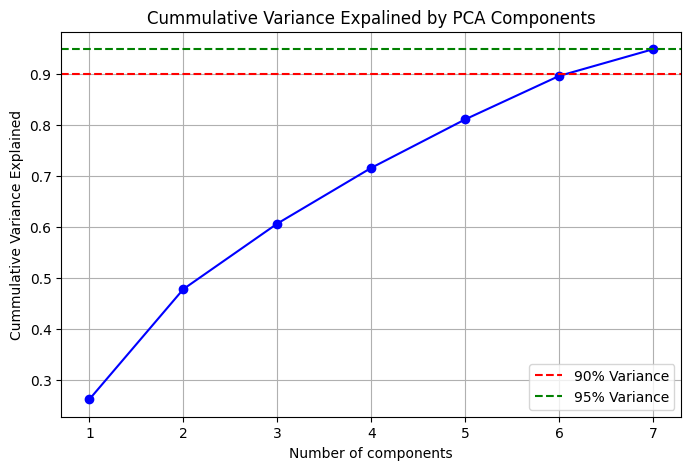

In [33]:
#7 Plot cummulative variance
plt.figure(figsize = (8,5))
plt.plot(range(1,len(cummulative_variance)+1), cummulative_variance, marker = 'o', linestyle = '-', color = 'b')
plt.title('Cummulative Variance Expalined by PCA Components')
plt.xlabel('Number of components')
plt.ylabel('Cummulative Variance Explained')
plt.axhline(y = 0.9, color = 'r', linestyle = '--', label = '90% Variance')
plt.axhline(y = 0.95, color = 'g', linestyle = '--', label = '95% Variance')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
#8 Print variance info
print("Explained variance ratio (each PC shows how much into it captures)")
print(explained_variance.round(3))

print("\nCummulative Variance (how much total info is captured):")
print(cummulative_variance.round(3))

Explained variance ratio (each PC shows how much into it captures)
[0.262 0.216 0.129 0.109 0.095 0.085 0.052]

Cummulative Variance (how much total info is captured):
[0.262 0.478 0.607 0.716 0.812 0.897 0.949]


In [35]:
#9 Find the features contribution (Loadings)
#Loadings tell us how each feature contribuytes to each principle component 
loadings = pd.DataFrame(
    pca.components_.T,    #Transpose to get features as rows
    columns= [f'PC{i+1}' for i in range(pca.n_components_)],
    index = numeric_cols
)

print("\nFeature Loadings (importance of each feature in each component):")
print(loadings.round(3))


Feature Loadings (importance of each feature in each component):
                            PC1    PC2    PC3    PC4    PC5    PC6    PC7
Pregnancies               0.128  0.594  0.013  0.081  0.476  0.194 -0.589
Glucose                   0.393  0.174 -0.468 -0.404 -0.466  0.094 -0.060
BloodPressure             0.360  0.184  0.535  0.056 -0.328 -0.634 -0.192
SkinThickness             0.440 -0.332  0.238  0.038  0.488  0.010  0.282
Insulin                   0.435 -0.251 -0.337 -0.350  0.347 -0.271 -0.132
BMI                       0.452 -0.101  0.362  0.054 -0.253  0.685 -0.035
DiabetesPedigreeFunction  0.271 -0.122 -0.433  0.834 -0.120 -0.086 -0.086
Age                       0.198  0.621 -0.075  0.071  0.109 -0.033  0.712


In [36]:
#Add-on: Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
# 10. Select the optimal number of components (eg: for 95% variance)
# Find the index of first component where cummulative variance >= 0..95
index_of_95 = np.argmax(cummulative_variance>=0.95)
#np.argmax returns the index of first 'True'. If no 'true' is found, it returns 0


In [38]:
#We much check ifthe 95% target was actually reached at that index
if cummulative_variance[index_of_95]>=0.95:
    n_opt = index_of_95+1
else:
    #if the target was NOT reahed, uses all available components
    n_opt = len(explained_variance)

print(f"\nOptimal number of components to retain 95% variance: {n_opt}")


Optimal number of components to retain 95% variance: 7


In [39]:
# Use the optimally reduced data for modelling
x_pca_reduced = data_pca[:,:n_opt]

In [40]:
#11 Prepare data and model
y = df['Outcome']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca_reduced, y,test_size=0.3, random_state=42, stratify = y)


In [41]:
#Initialize and train the Logistic Regression model
log_reg = LogisticRegression(solver = 'liblinear', random_state=42, max_iter = 1000)
log_reg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
# 12. Predict and Evaluater
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 0.7489
